张量表示一个数值组成的数组

In [1]:
import torch

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
# 返回tensor中元素数量
x.numel()

12

In [5]:
x = x.reshape(3, 4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
x.shape

torch.Size([3, 4])

In [7]:
x.numel()

12

In [8]:
y = torch.zeros((2, 3, 4))
print(y, y.shape, y.numel())

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]) torch.Size([2, 3, 4]) 24


In [9]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [10]:
torch.tensor([[[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]]]).shape

torch.Size([1, 3, 4])

In [11]:
x = torch.tensor([1.0, 2, 4, 8]) # 浮点
y = torch.tensor([2, 2, 2, 2])

# 按元素计算
x + y, x - y, x*y, x/y, x**y  # **为按照幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [12]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [13]:
x = torch.arange(12, dtype=torch.float32).reshape((3,4))
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

torch.cat((x, y), dim=0), torch.cat((x,y), dim=1) # dim=0 按行 dim=1 按列

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [14]:
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [15]:
x.sum()

tensor(66.)

In [16]:
# 广播机制 tensor的元素形状大小不一致，但是维度相同，会复制行/列使其形状大小一致后可加

a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))

a, b, a+b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

In [17]:
x[-1], x[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [18]:
x[1, 2] = 9
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [19]:
x[0:2, :] = 12
x

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [20]:
# 内存位置会发生变化
before = id(x)
y = y + x
id(y) == before

False

In [21]:
# 原地处理，不修改内存位置
z = torch.zeros_like(y)
print('id(z):', id(z))
z[:] = x+y
print('id(z):', id(z))

id(z): 4378083632
id(z): 4378083632


In [22]:
# 转化为numpy
a = x.numpy()
b = torch.tensor(a)

type(a), type(b)

(numpy.ndarray, torch.Tensor)

In [23]:
a = torch.tensor([3.5])
a, a.item(), int(a), float(a)

(tensor([3.5000]), 3.5, 3, 3.5)

In [24]:
import os

os.makedirs(os.path.join('..', 'DeepLearning/data'), exist_ok=True)
data_file = os.path.join('..', 'DeepLearning/data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [25]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [29]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean(numeric_only=True))

inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [ ]:
# 将非数值型数据转化为 one-hot 编码
# pandas 生成默认为bool类型，即 true false, 需要增加 dtype
inputs = pd.get_dummies(inputs, dummy_na=True, dtype=int)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [ ]:
# torch 默认 64 位浮点数
x, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
x, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

- 矩阵的乘法可以理解为空间的扭曲，也就是基坐标的变换。
- 特征向量是指不被矩阵改变方向的向量，对称矩阵总是可以找得到特征向量

In [32]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [33]:
x[3]

tensor(3)

In [34]:
len(x), x.shape

(4, torch.Size([4]))

In [37]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [38]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [39]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [40]:
B.T == B

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [41]:
x = torch.arange(24).reshape(2, 3, 4)
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [42]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [ ]:
# 按元素相乘 哈达玛积 Hadamard product
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [45]:
a = 2
x = torch.arange(24).reshape(2, 3, 4)
x, a + x, (a * x).shape

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [46]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [56]:
A = torch.arange(40, dtype=torch.float32).reshape(2, 5, 4)
A, A.shape, A.sum()

(tensor([[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.],
          [16., 17., 18., 19.]],
 
         [[20., 21., 22., 23.],
          [24., 25., 26., 27.],
          [28., 29., 30., 31.],
          [32., 33., 34., 35.],
          [36., 37., 38., 39.]]]),
 torch.Size([2, 5, 4]),
 tensor(780.))

In [57]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([[20., 22., 24., 26.],
         [28., 30., 32., 34.],
         [36., 38., 40., 42.],
         [44., 46., 48., 50.],
         [52., 54., 56., 58.]]),
 torch.Size([5, 4]))

In [58]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([[ 40.,  45.,  50.,  55.],
         [140., 145., 150., 155.]]),
 torch.Size([2, 4]))

In [59]:
A_sum_axis01 = A.sum(axis=[0, 1])
A_sum_axis01, A_sum_axis01.shape

(tensor([180., 190., 200., 210.]), torch.Size([4]))

In [60]:
A

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]],

        [[20., 21., 22., 23.],
         [24., 25., 26., 27.],
         [28., 29., 30., 31.],
         [32., 33., 34., 35.],
         [36., 37., 38., 39.]]])

In [ ]:
# 针对mean 求和需要浮点数，不能要整数
A.mean(), A.sum() / A.numel()

(tensor(19.5000), tensor(19.5000))

In [62]:
A.mean(axis=0), A.sum(axis=0)/A.shape[0]

(tensor([[10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.],
         [26., 27., 28., 29.]]),
 tensor([[10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.],
         [26., 27., 28., 29.]]))

In [ ]:
# keepdims = True 保留求和的维度，改为1，在广播机制里面很有用
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[[ 40.,  45.,  50.,  55.]],
 
         [[140., 145., 150., 155.]]]),
 torch.Size([2, 1, 4]))

In [64]:
A / sum_A

tensor([[[0.0000, 0.0222, 0.0400, 0.0545],
         [0.1000, 0.1111, 0.1200, 0.1273],
         [0.2000, 0.2000, 0.2000, 0.2000],
         [0.3000, 0.2889, 0.2800, 0.2727],
         [0.4000, 0.3778, 0.3600, 0.3455]],

        [[0.1429, 0.1448, 0.1467, 0.1484],
         [0.1714, 0.1724, 0.1733, 0.1742],
         [0.2000, 0.2000, 0.2000, 0.2000],
         [0.2286, 0.2276, 0.2267, 0.2258],
         [0.2571, 0.2552, 0.2533, 0.2516]]])

In [67]:
A

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]],

        [[20., 21., 22., 23.],
         [24., 25., 26., 27.],
         [28., 29., 30., 31.],
         [32., 33., 34., 35.],
         [36., 37., 38., 39.]]])

In [68]:
A.cumsum(axis=2)

tensor([[[  0.,   1.,   3.,   6.],
         [  4.,   9.,  15.,  22.],
         [  8.,  17.,  27.,  38.],
         [ 12.,  25.,  39.,  54.],
         [ 16.,  33.,  51.,  70.]],

        [[ 20.,  41.,  63.,  86.],
         [ 24.,  49.,  75., 102.],
         [ 28.,  57.,  87., 118.],
         [ 32.,  65.,  99., 134.],
         [ 36.,  73., 111., 150.]]])

In [ ]:
# 点积 按元素乘积
y = torch.ones(4, dtype=torch.float32)
x = torch.tensor([0, 1, 2, 3], dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [ ]:
# 矩阵和向量相乘 mv
A.sum(axis=0), x.shape, torch.mv(A.sum(axis=0), x)

(tensor([[20., 22., 24., 26.],
         [28., 30., 32., 34.],
         [36., 38., 40., 42.],
         [44., 46., 48., 50.],
         [52., 54., 56., 58.]]),
 torch.Size([4]),
 tensor([148., 196., 244., 292., 340.]))

In [ ]:
# 矩阵与矩阵乘法 mm
B = torch.ones(4, 3)
torch.mm(A.sum(axis=0), B)

tensor([[ 92.,  92.,  92.],
        [124., 124., 124.],
        [156., 156., 156.],
        [188., 188., 188.],
        [220., 220., 220.]])

In [77]:
# L2 范数
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [78]:
# L1 范数
torch.abs(u).sum()

tensor(7.)

矩阵的F范数
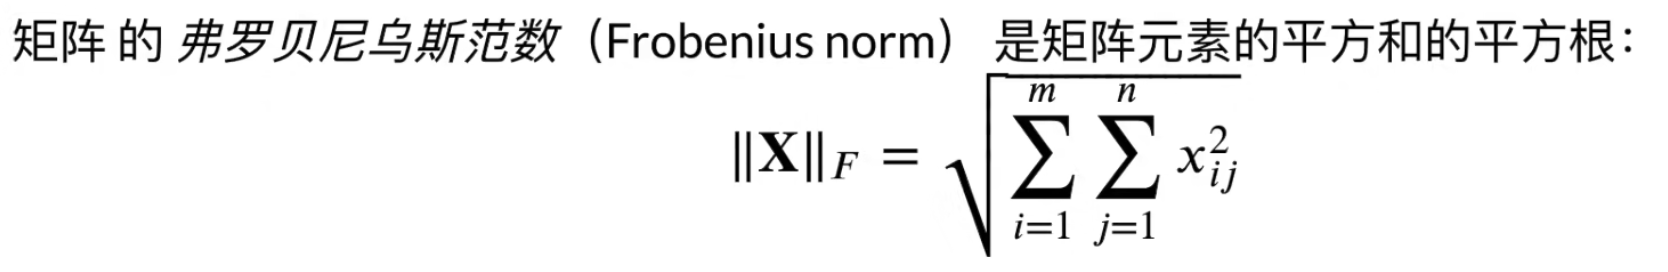

In [ ]:
# 矩阵的F 范数
torch.norm(torch.ones((4, 9)))

tensor(6.)

### 矩阵的导数

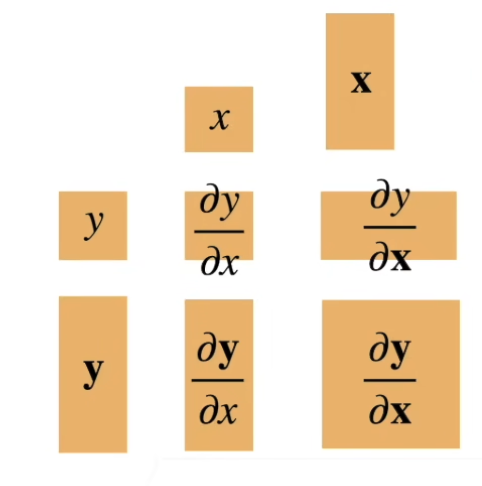

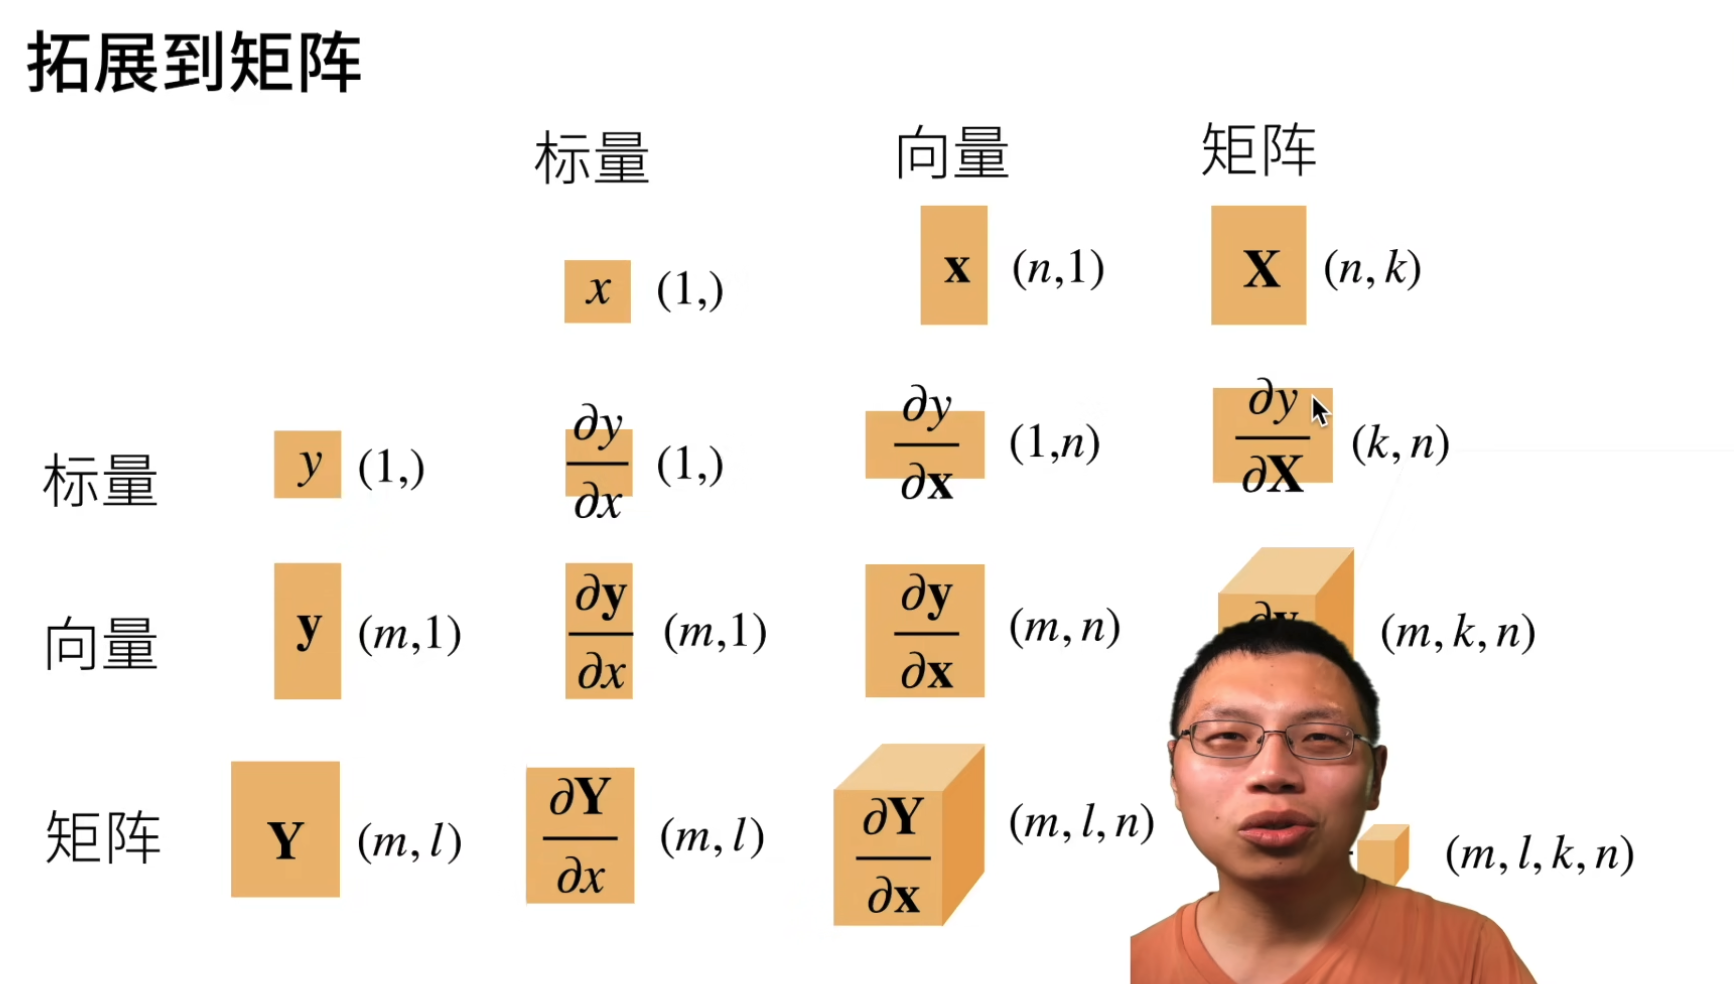

### 计算图

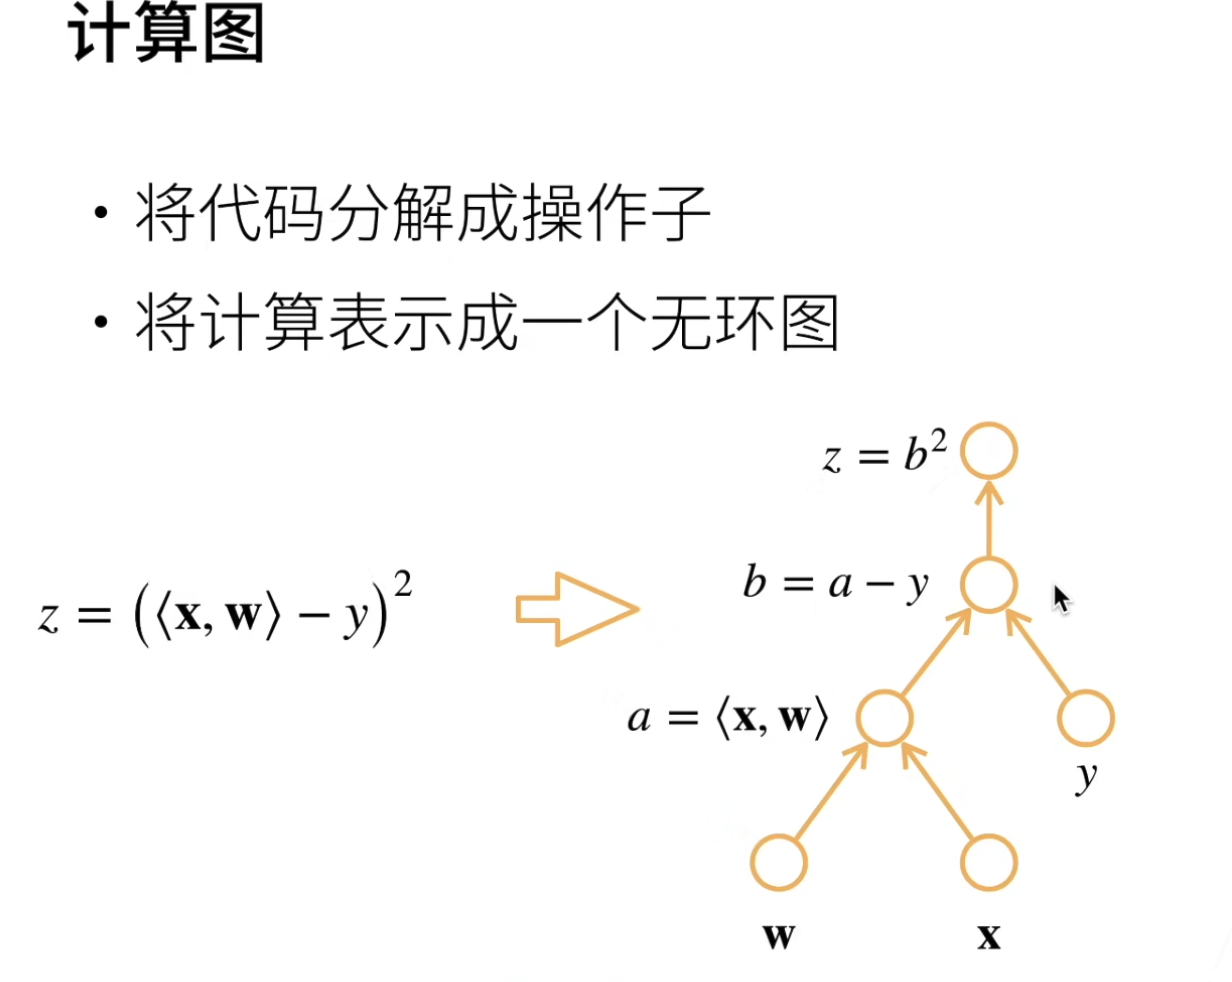

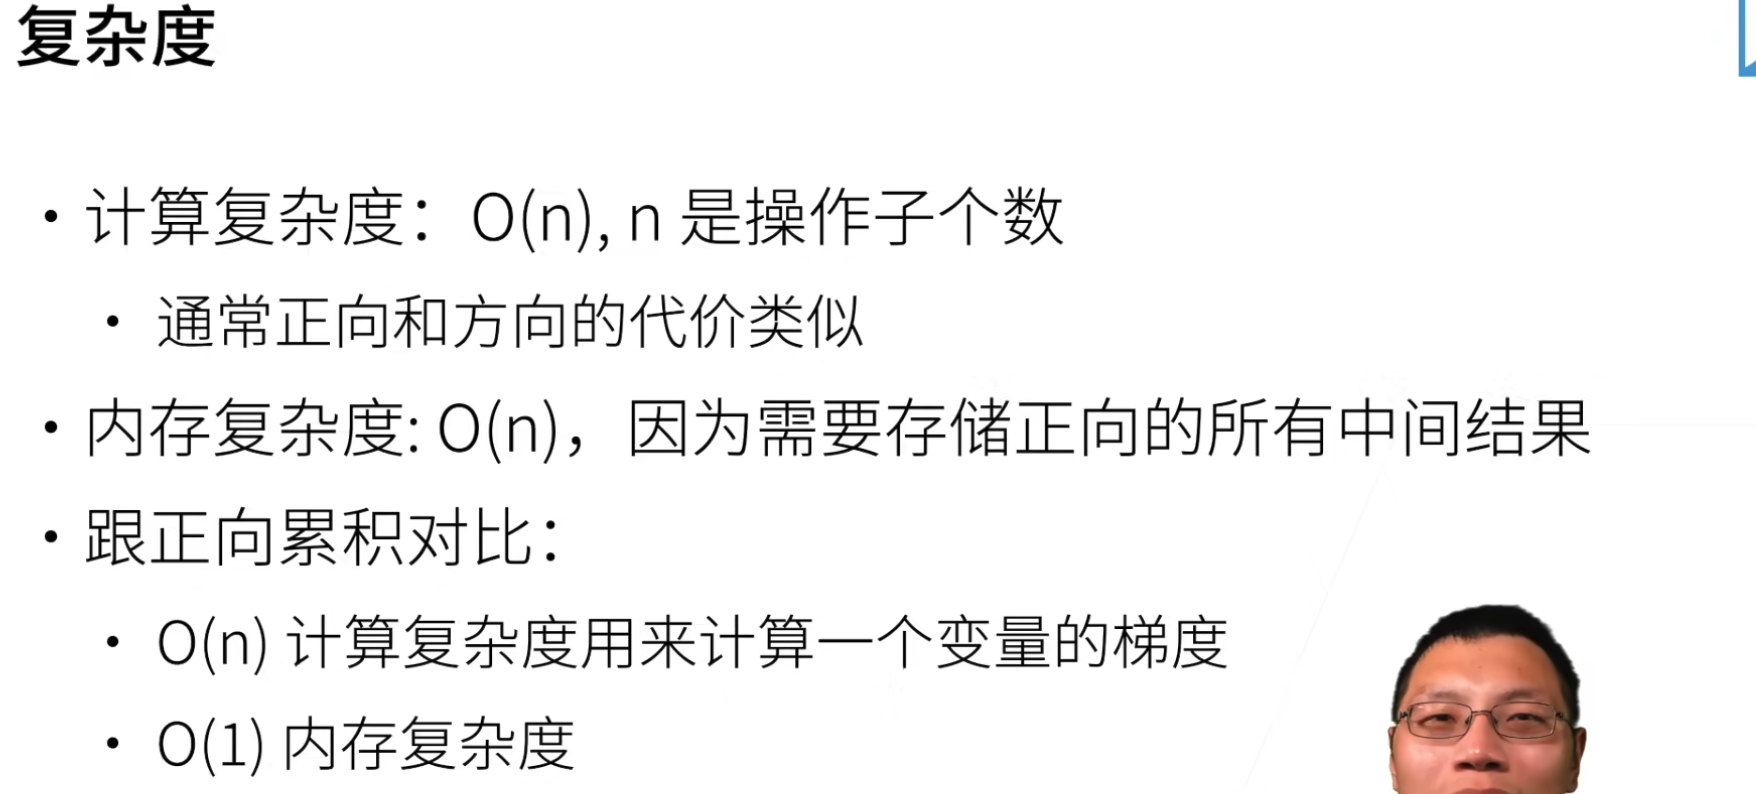

In [80]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [81]:
x.requires_grad_(True) # 等价于 x = torch.arange(4.0, requires_grad = True)
x.grad

In [82]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [83]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [84]:
x.grad == 4*x

tensor([True, True, True, True])

In [88]:
# 默认情况下 pytorch 会累积梯度，需要清楚之前的值
x.grad.zero_()

y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [89]:
y = x.sum()
y.backward()
x.grad

tensor([2., 2., 2., 2.])

In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()  # u 当作常数
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])